In [ ]:
#import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [ ]:
#import data files
df1 = pd.read_csv('/content/Car name.csv')
df2 = pd.read_json('/content/car.json')

df=pd.concat([df1, df2], axis=1)
df.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [ ]:
#simple investigation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [ ]:
df.shape

(398, 9)

In [ ]:
#ensure the data quality by removing null values and duplicate values
df.isnull().sum()

,0
car_name,0
mpg,0
cyl,0
disp,0
hp,0
wt,0
acc,0
yr,0
origin,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
# Checking for non-numeric entries in 'hp' data
df['hp'].str.isnumeric().value_counts()[False]

#since there are only 6 values we will remove them,convert the column to numeric. Non-numeric values will be NaN
df['hp'] = pd.to_numeric(df['hp'], errors='coerce')

# Remove rows with NaN in 'hp' column
df = df.dropna(subset=['hp'])

In [ ]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  392 non-null    object 
 1   mpg       392 non-null    float64
 2   cyl       392 non-null    int64  
 3   disp      392 non-null    float64
 4   hp        392 non-null    float64
 5   wt        392 non-null    int64  
 6   acc       392 non-null    float64
 7   yr        392 non-null    int64  
 8   origin    392 non-null    int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


In [ ]:
#engineer features that potentially enhance model predictions, such as power-to-weight ratios.
df['power_to_weight_ratio'] = df['hp'] / df['wt']
df.head()

<ipython-input-12-d75ea0b23dc1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['power_to_weight_ratio'] = df['hp'] / df['wt']


,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin,power_to_weight_ratio
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1,0.037100
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1,0.044679
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1,0.043655
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1,0.043694
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,1,0.040591


**EDA PHASE **

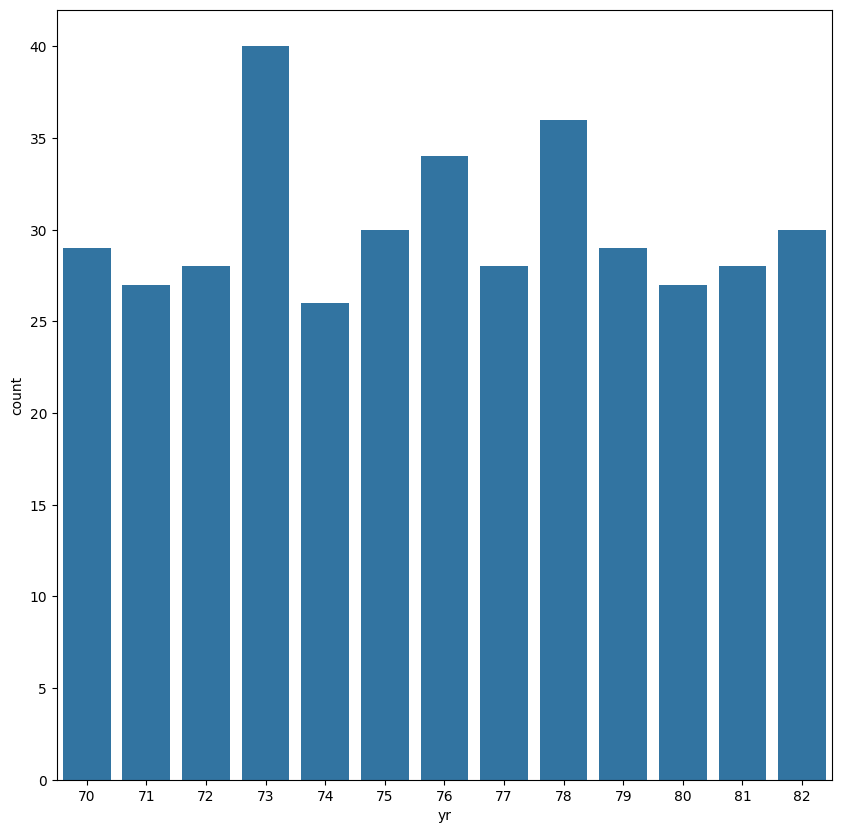

In [ ]:
#univarient analyses
plt.figure(figsize=(10, 10))
sns.countplot(x=df['yr'])
plt.show()

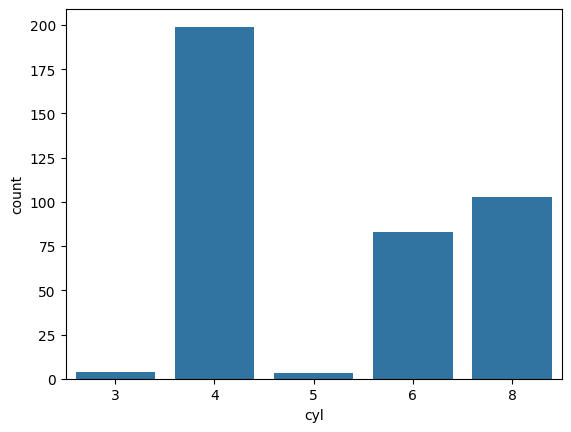

In [ ]:
sns.countplot(x=df['cyl'])
plt.show()

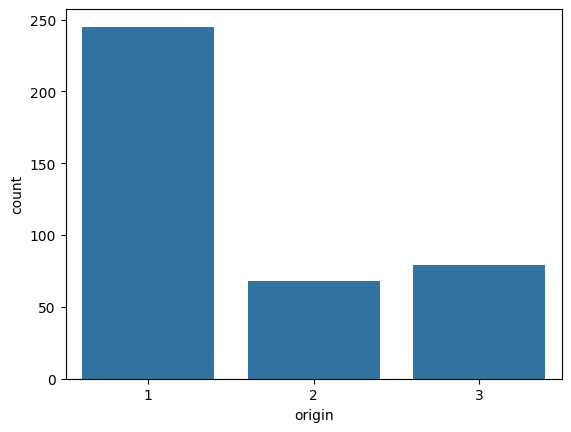

In [ ]:
sns.countplot(x=df['origin'])
plt.show()

# **Observations Here! **


*  we can see in the plot of the year column:


1.   that the highst year of manufacturing cars is 73
2.   Model year vary between 70 to 82



* Number of cylinders in the cars vary between 3 to 8.

*  Origin data has possible values of 1, 2 and 3
*   Majority of the cars in the dataset contain 4 cylinders and have Origin value 1.





<Axes: xlabel='wt', ylabel='disp'>

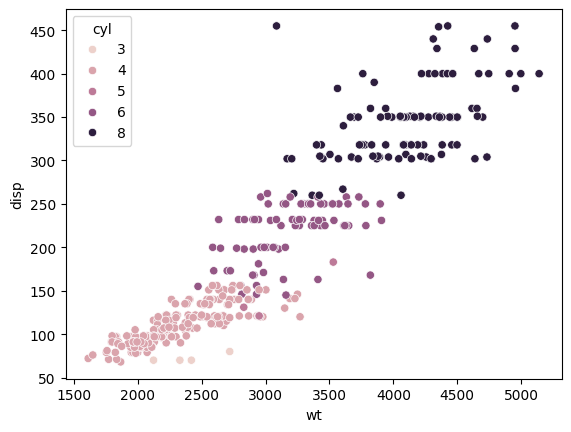

In [ ]:
#mutlivarinet analysis

sns.scatterplot(df, x='wt', y='disp', hue='cyl')

   
*   List itemNumber of Cylinders and the Displacement value apparently is increasing with increase in Weight.
* Greater the weight of a car, greater would be the power required to drive it which would require more number of cylinders, and as a result, the displacement value would also be higher.



<Axes: xlabel='wt', ylabel='mpg'>

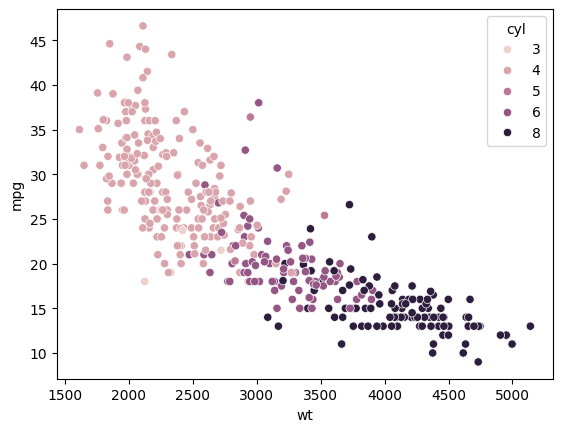

In [ ]:
sns.scatterplot(df, x='wt', y='mpg', hue='cyl')



*   mpg value is apparently decreasing with increase in weight.
*Greater the weight of a car, greater would be the power required to drive it which would require more number of cylinders and higher displacement that would result in a higher fuel consumption.



# Clustering Analysis

In [ ]:
# choose relevant features for clustring
X = df[['mpg',  'hp', 'wt',]]
# scaling for numerical values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



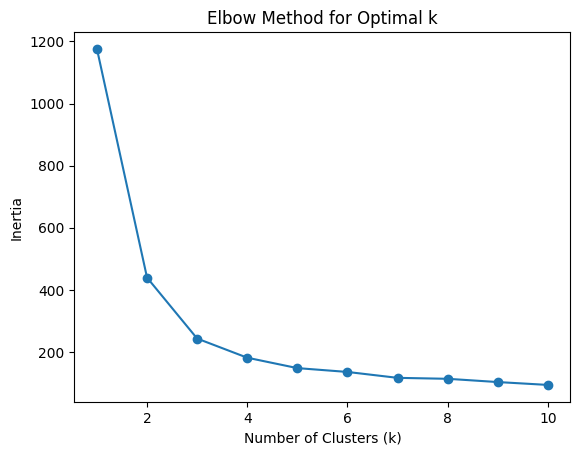

In [ ]:
#detemine optimal numbers of clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

In [ ]:
!pip install plotly==5.15.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 55.6 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1


In [ ]:
#since there are 3 features we can use 3d plot
import plotly.express as px

fig = px.scatter_3d(df, x='mpg', y='hp', z='wt', color='cluster')
fig.show()

In [ ]:
# and another way we can use power to weight ratio with mpg for clustering
X = df[['mpg', 'power_to_weight_ratio']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

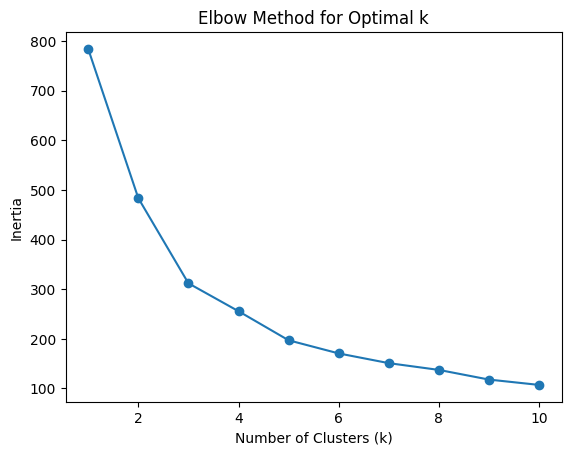

In [ ]:
#Elbow plot
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster2'] = kmeans.fit_predict(X_scaled)

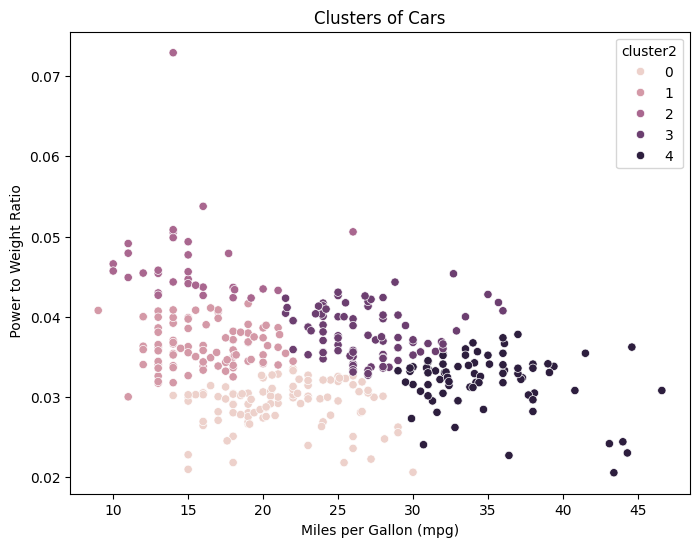

In [ ]:
#visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(df, x='mpg', y='power_to_weight_ratio', hue='cluster2')
plt.title('Clusters of Cars')
plt.xlabel('Miles per Gallon (mpg)')
plt.ylabel(' Power to Weight Ratio')
plt.show()


# Regression Analysis

Cluster 2: MSE = 7.29


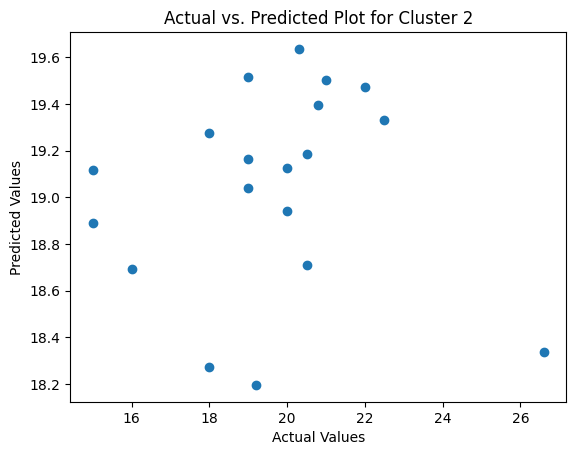

Cluster 1: MSE = 2.99


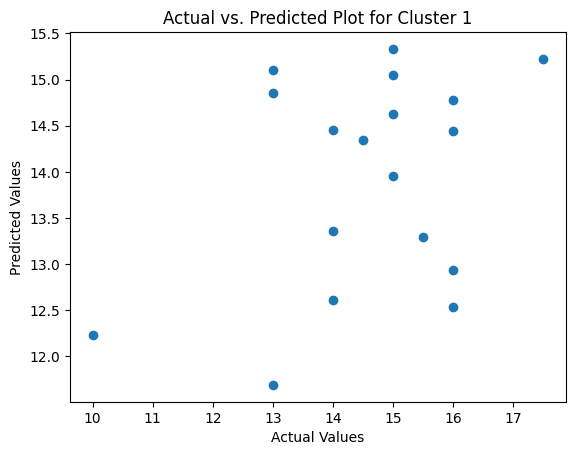

Cluster 0: MSE = 6.84


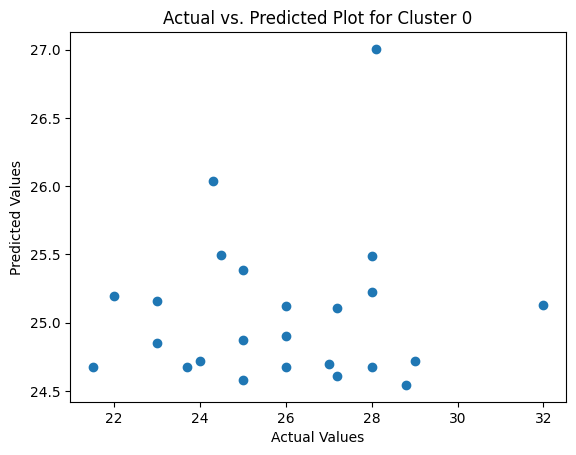

Cluster 3: MSE = 20.81


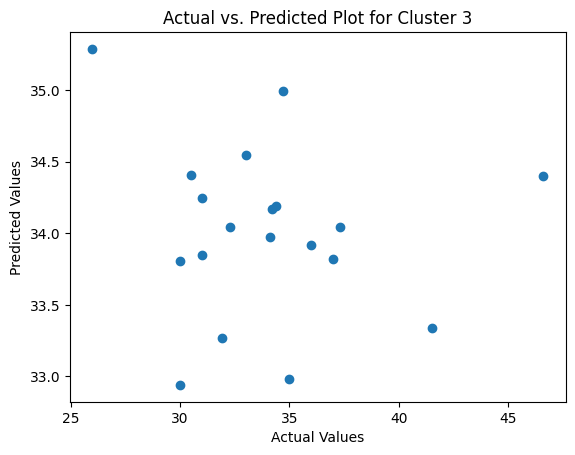

In [ ]:
#for the 4_clusters
#split data for each cluster ,train each X_train & Y_train for each cluster  df['cluster']

mse_values = []
for cluster_id in df['cluster'].unique():
    cluster_data = df[df['cluster'] == cluster_id]
    X = cluster_data[['hp', 'wt', 'power_to_weight_ratio']]
    y = cluster_data['mpg']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    # Append MSE to the list
    mse_values.append(mse)
    print(f'Cluster {cluster_id}: MSE = {mse:.2f}')
    plt.figure()
    plt.scatter(y_test, y_pred)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Actual vs. Predicted Plot for Cluster {cluster_id}')
    plt.show()

# Create a dictionary to map cluster IDs to their MSE values
mse_map = {cluster_id: mse for cluster_id, mse in zip(df['cluster2'].unique(), mse_values)}

# Add a new column 'mse' to the DataFrame using the mapping
df['mse'] = df['cluster'].map(mse_map)

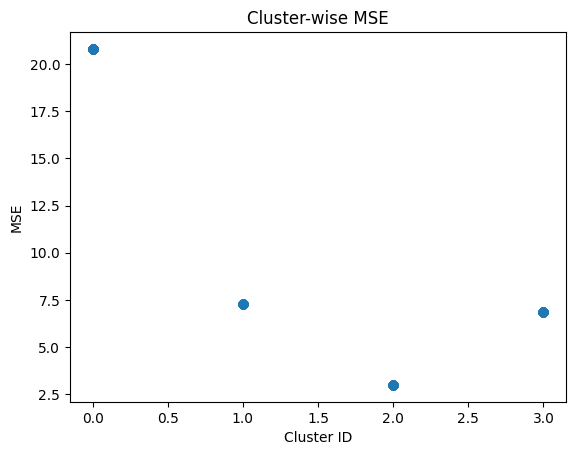

In [ ]:
plt.scatter(df['cluster'], df['mse'])

# Add labels and title
plt.xlabel('Cluster ID')
plt.ylabel('MSE')
plt.title('Cluster-wise MSE')

# Show the plot
plt.show()

Cluster 1: MSE = 2.19


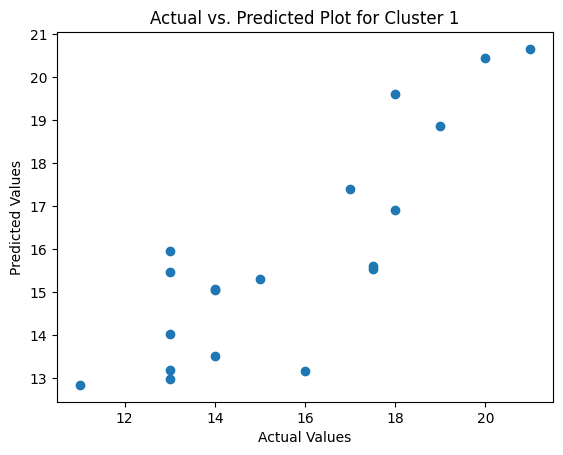

Cluster 2: MSE = 3.07


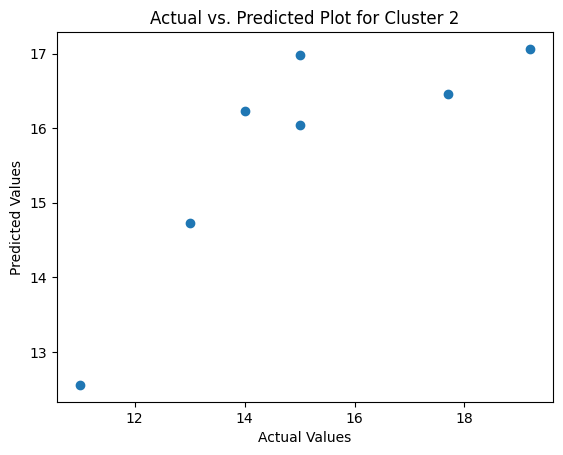

Cluster 3: MSE = 7.81


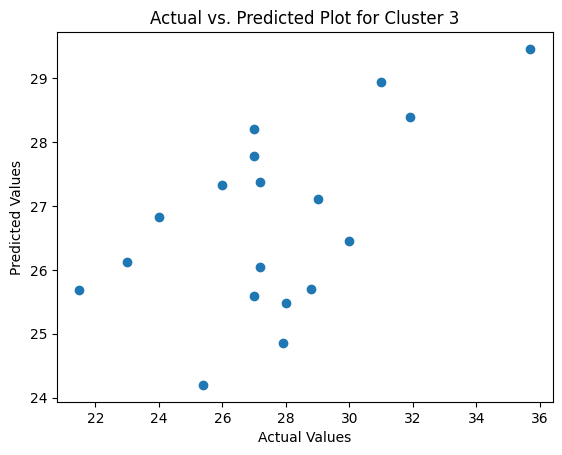

Cluster 0: MSE = 10.40


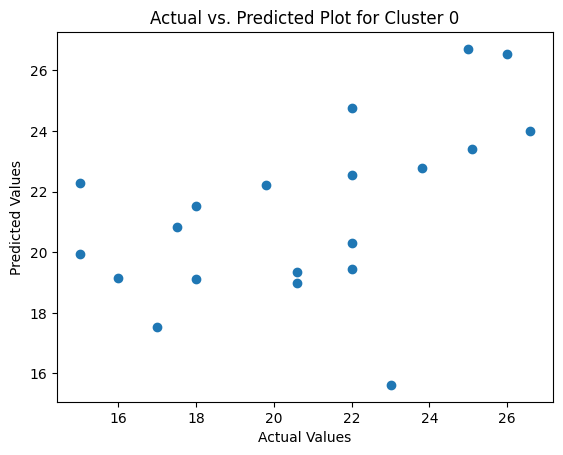

Cluster 4: MSE = 13.81


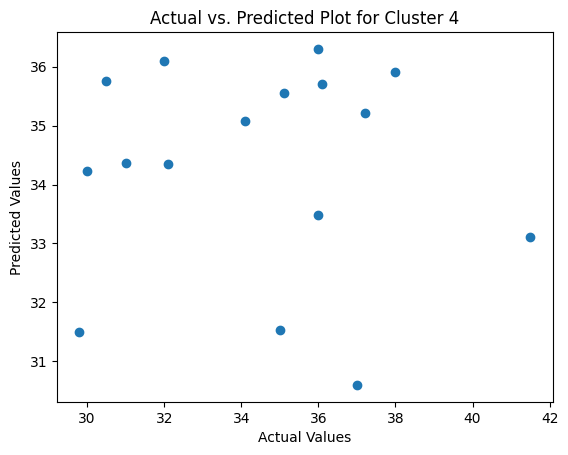

In [ ]:
# for the 5_clusters
mse_values = []
for cluster_id in df['cluster2'].unique():
    cluster_data = df[df['cluster2'] == cluster_id]
    X = cluster_data[['hp', 'wt', 'power_to_weight_ratio']]
    y = cluster_data['mpg']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    # Append MSE to the list
    mse_values.append(mse)
    print(f'Cluster {cluster_id}: MSE = {mse:.2f}')
    plt.figure()
    plt.scatter(y_test, y_pred)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Actual vs. Predicted Plot for Cluster {cluster_id}')
    plt.show()

# Create a dictionary to map cluster IDs to their MSE values
mse_map = {cluster_id: mse for cluster_id, mse in zip(df['cluster2'].unique(), mse_values)}

# Add a new column 'mse' to the DataFrame using the mapping
df['mse2'] = df['cluster2'].map(mse_map)

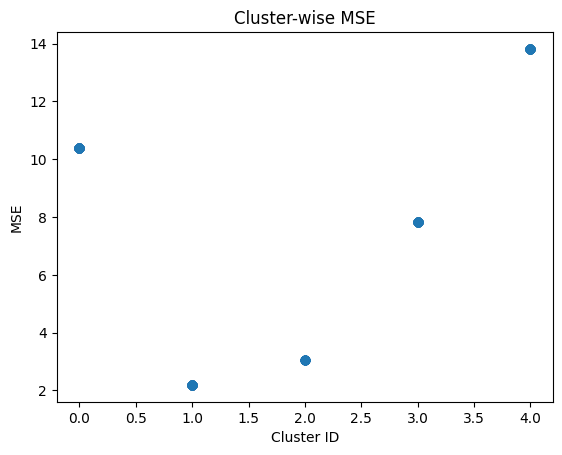

In [ ]:
plt.scatter(df['cluster2'], df['mse2'])

# Add labels and title
plt.xlabel('Cluster ID')
plt.ylabel('MSE')
plt.title('Cluster-wise MSE')

# Show the plot
plt.show()